In [1]:
# We are getting the sentiment analysis of text from Twitter users tweeting about Coronavirus

In [2]:
import pandas as pd 
import nltk

In [3]:
df = pd.read_csv("Corona_NLP_test.csv")

In [5]:
#Get rid of any tweets by the same user in the dataset
df1=df.drop_duplicates()
df1.duplicated().sum()
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
#Cleaning the data down to the OriginalTweet and Sentiment 
del df1 ['UserName']
del df1 ['ScreenName']
del df1 ['Location']
del df1 ['TweetAt']
print(list(df1))
#Converting all text to lowercase
df1['OriginalTweet']= df1['OriginalTweet'].str.lower()

['OriginalTweet', 'Sentiment']


In [7]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    Tweet = row['OriginalTweet']
    tokens = nltk.word_tokenize(Tweet)
    # Take only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df1['Tweets'] = df1.apply(identify_tokens, axis=1)

print(df1["Tweets"])

0       [trending, new, yorkers, encounter, empty, sup...
1       [when, i, could, find, hand, sanitizer, at, fr...
2       [find, out, how, you, can, protect, yourself, ...
3       [panic, buying, hits, newyork, city, as, anxio...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, pe...
3794    [did, you, panic, buy, a, lot, of, items, echo...
3795    [asst, prof, of, economics, cconces, was, on, ...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, forestandpaper, members, are, committ...
Name: Tweets, Length: 3798, dtype: object


In [8]:
#Removed the stop words from the tokenized tweets
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 

def remove_stops(row):
    my_list = row['Tweets']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df1['stem_meaningful'] = df1.apply(remove_stops, axis=1)

print(df1['stem_meaningful'])

0       [trending, new, yorkers, encounter, empty, sup...
1       [could, find, hand, sanitizer, fred, meyer, tu...
2               [find, protect, loved, ones, coronavirus]
3       [panic, buying, hits, newyork, city, anxious, ...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, supermarket, israel, people, dance...
3794    [panic, buy, lot, items, echo, needs, food, do...
3795    [asst, prof, economics, cconces, nbcphiladelph...
3796    [gov, need, somethings, instead, biar, je, rak...
3797    [forestandpaper, members, committed, safety, e...
Name: stem_meaningful, Length: 3798, dtype: object


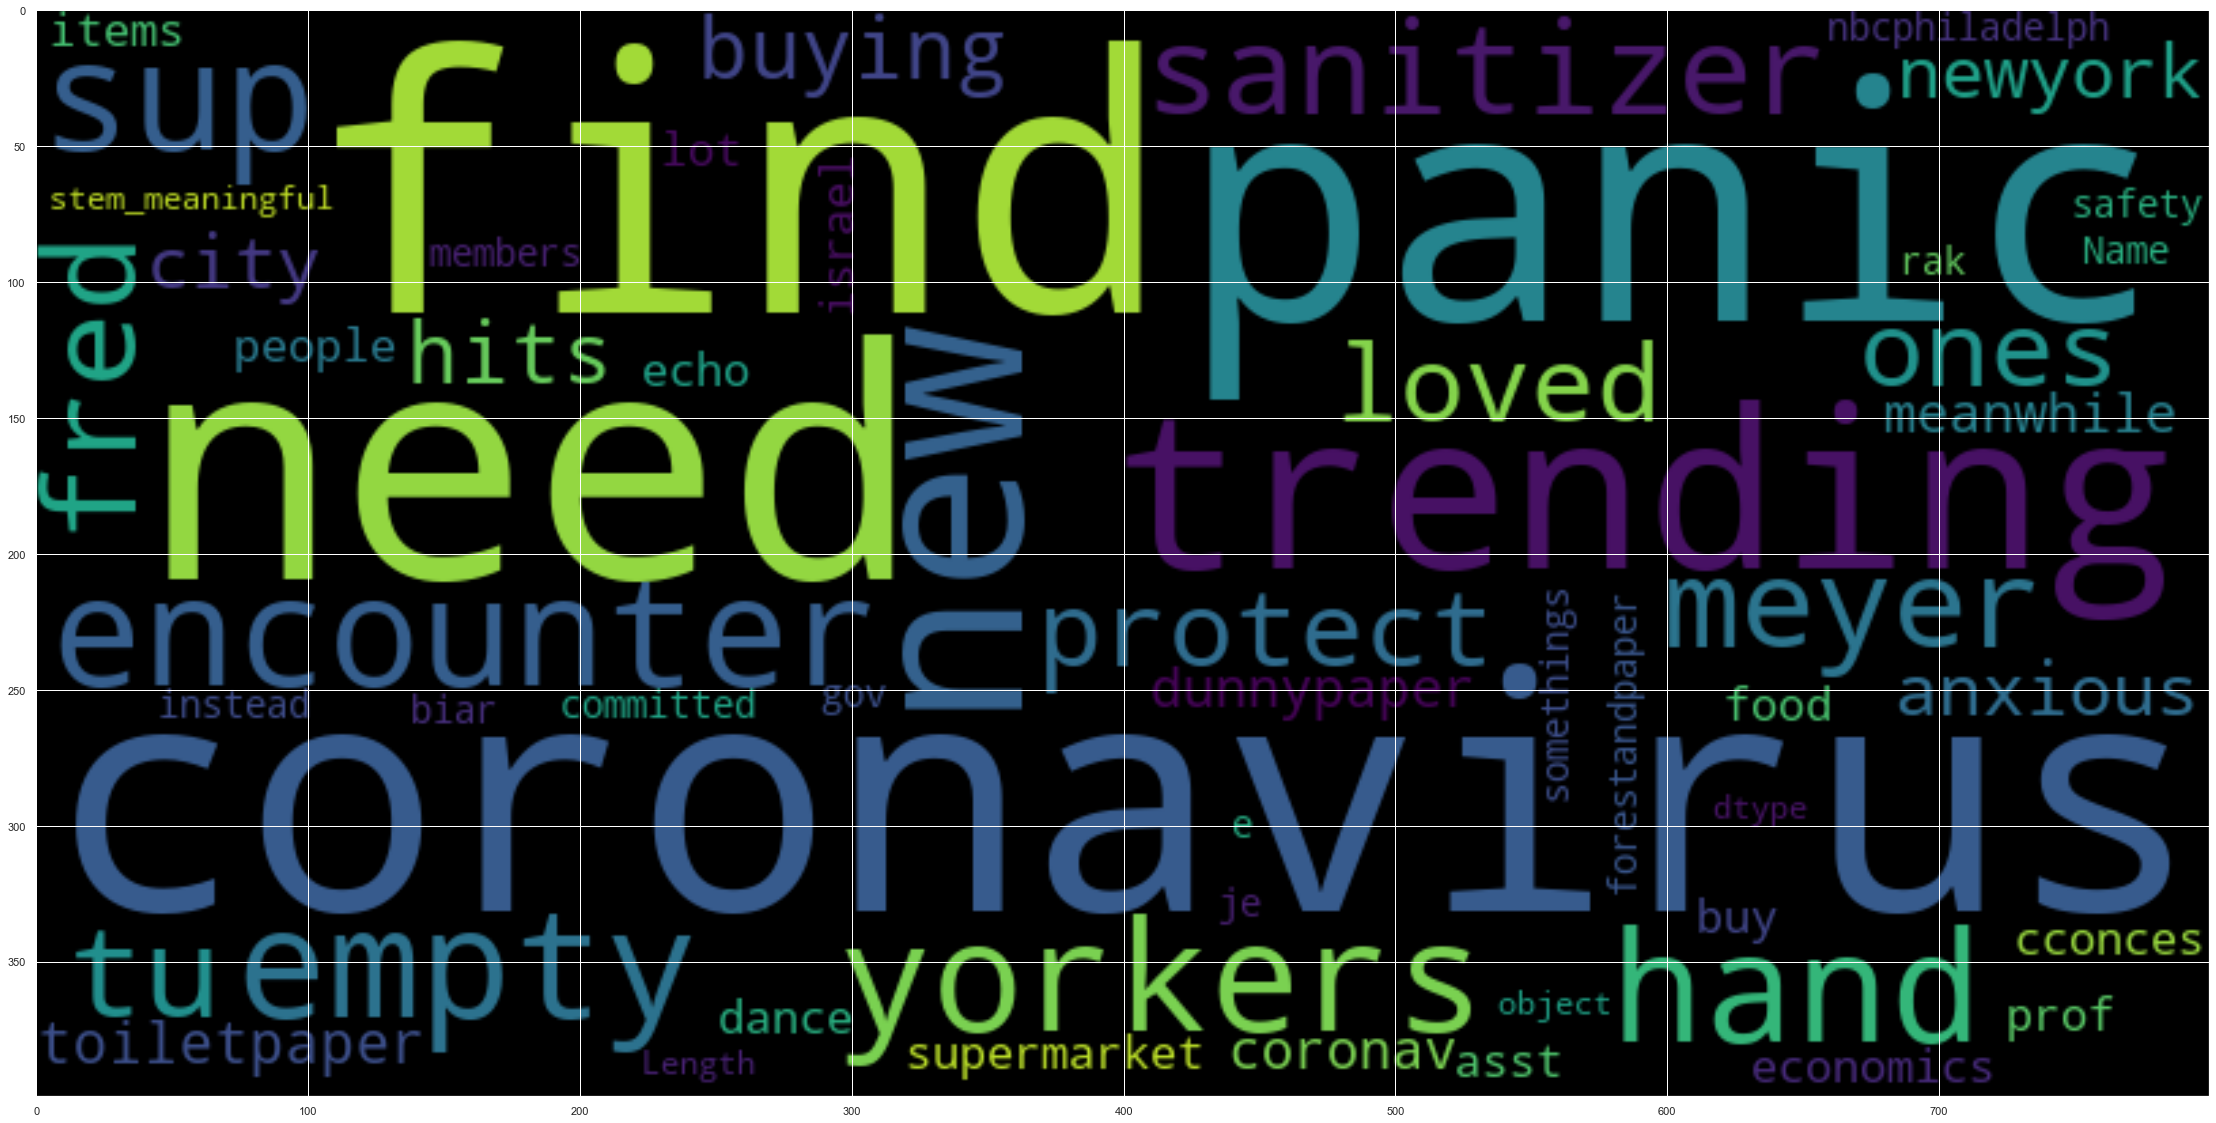

In [12]:
#Visualize the data by sorting it into a wordblob 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

text =df1['stem_meaningful']

# Generate a word cloud image

wordcloud = WordCloud(background_color="black", width=800, height=400).generate(str(text))

# Display the generated image:

plt.figure( figsize=(50,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

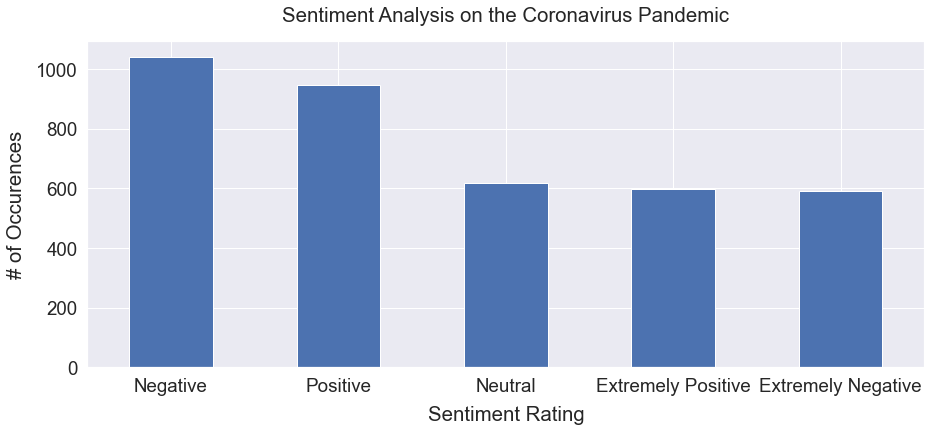

In [10]:
#Generate a bar graph based on the Senitment Analysis in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.7)
df1['Sentiment'].value_counts().plot(kind='bar', figsize=(15,6), rot = 0)
plt.xlabel("Sentiment Rating", labelpad = 10)
plt.ylabel("# of Occurences", labelpad = 10)
plt.title("Sentiment Analysis on the Coronavirus Pandemic", y = 1.0420)
sns.set(color_codes=True)